In [1]:
#dependancies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model as lin 
from sklearn import preprocessing as pre
from sklearn import metrics as met
from sklearn import model_selection as mod
from sklearn import pipeline as pip
from sklearn import datasets as dat

In [11]:
#plot learning curve function
def plotLearningCurve(est, X_train, y_train, X_test, y_test, n_iter=10, minY=0,maxY=1):
    x_values = [] #number of training samples
    y_values_train = []
    y_values_test = []

    for i in np.linspace(10,len(X_train),n_iter): #increase training sizes by every iter
        i=int(i)
        #select a subset of training data
        X_train_temp = X_train[:i]
        y_train_temp = y_train[:i]
        #create the model
        est.fit(X_train_temp, y_train_temp)
        #evaluate train set
        y_pred_train=est.predict(X_train_temp)
        train_score = met.mean_squared_error(y_train_temp,y_pred_train,squared=False)
        #evaluate test set
        y_pred_test=est.predict(X_test)
        test_score = met.mean_squared_error(y_test,y_pred_test,squared=False)
        #populate lists
        y_values_train.append(train_score)
        y_values_test.append(test_score)
        x_values.append(i)
    plt.figure(figsize=(10,6))
    plt.plot(x_values,y_values_train,label="Train")
    plt.plot(x_values,y_values_test, label="Test")
    plt.legend()
    plt.ylabel("RMSE")
    plt.xlabel("# of training samples")
    plt.grid(True)
    plt.ylim(minY,maxY)
    plt.show()



In [2]:
#load the data
data = dat.load_diabetes()
X = data.data
y = data.target


In [3]:
#split the data 
X_train,X_test,y_train,y_test = mod.train_test_split(X,y,random_state=42)

In [9]:
#create the pipeline
pipe = pip.Pipeline([
    ("scaler", pre.StandardScaler()), #anything besides last one needs to have transform and fit method
    ("sgd", lin.SGDRegressor(random_state=42)), #last one needs to have fit method
])

pipe.fit(X_train,y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(random_state=42))])

In [22]:
y_predict = pipe.predict(X_test)

In [27]:
#test the prediction 
met.mean_squared_error(y_test,y_predict,squared=False)

53.38270482378061

In [20]:
# 3 fold cross validation
mod.cross_val_score(pipe, X_train, y_train.ravel(), 
                    cv=3, scoring="neg_root_mean_squared_error").mean()*-1 



56.43451900121812

In [12]:
#linear regression
lin_reg = lin.LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [31]:
lin_reg_y_predict = lin_reg.predict(X_test)

In [32]:
# lin reg 3 fold cross validation
mod.cross_val_score(lin_reg, X_train, y_train.ravel(), 
                    cv=3, scoring="neg_root_mean_squared_error").mean()*-1 

56.341238094702256

In [33]:
#lin reg predict
met.mean_squared_error(y_test,lin_reg_y_predict,squared=False)

53.36942296795932

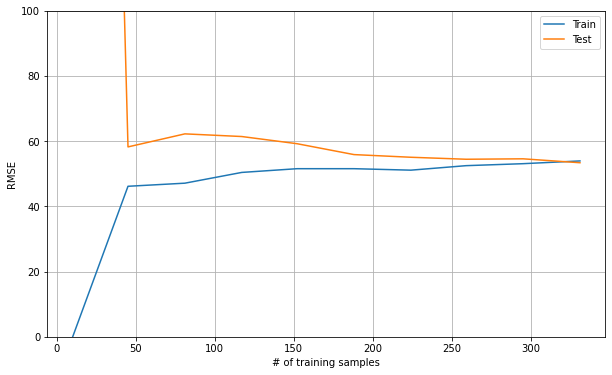

In [24]:
plotLearningCurve(lin_reg, X_train, y_train.ravel(), X_test, y_test.ravel(), n_iter=10,maxY=100)

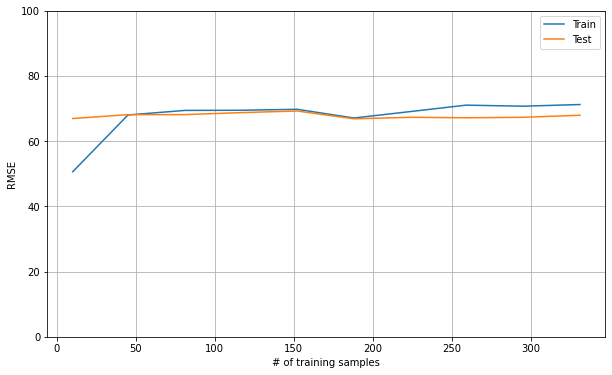

In [25]:
pipe2 = pip.Pipeline([
    ("scaler", pre.StandardScaler()), #anything besides last one needs to have transform and fit method
    ("sgd", lin.SGDRegressor(alpha=10,random_state=42)), #last one needs to have fit method
])

pipe2.fit(X_train,y_train.ravel())
plotLearningCurve(pipe2, X_train, y_train.ravel(), X_test, y_test.ravel(), n_iter=10,maxY=100)


In [34]:
#  alpha = 10 3 fold cross validation
mod.cross_val_score(pipe2, X_train, y_train.ravel(), 
                    cv=3, scoring="neg_root_mean_squared_error").mean()*-1 

70.98862272353186

In [35]:
alpha10_y_predict = pipe2.predict(X_test)

In [36]:
# alpha = 10 model fit rmse
met.mean_squared_error(y_test,alpha10_y_predict,squared=False)

67.92850761031465

In [42]:
#gridsearch
myParams = {
    "sgd__alpha":[0.001,0.01,0.1],
    "sgd__penalty":["l1","l2"],
    "sgd__max_iter":[1000,10000,100000]
}
grid = mod.GridSearchCV(pipe, myParams, scoring="neg_root_mean_squared_error", cv=3)
grid.fit(X_train,y_train.ravel())
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgd__alpha,param_sgd__max_iter,param_sgd__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002219,5.665388e-04,0.001118,0.000171,0.001,1000,l1,"{'sgd__alpha': 0.001, 'sgd__max_iter': 1000, '...",-56.756817,-52.480077,-60.067279,-56.434724,3.105824,10
1,0.002335,4.705277e-04,0.000334,0.000472,0.001,1000,l2,"{'sgd__alpha': 0.001, 'sgd__max_iter': 1000, '...",-56.751027,-52.478735,-60.062768,-56.430843,3.104435,7
2,0.002339,4.669273e-04,0.000000,0.000000,0.001,10000,l1,"{'sgd__alpha': 0.001, 'sgd__max_iter': 10000, ...",-56.756817,-52.480077,-60.067279,-56.434724,3.105824,10
3,0.002340,4.745831e-04,0.000334,0.000472,0.001,10000,l2,"{'sgd__alpha': 0.001, 'sgd__max_iter': 10000, ...",-56.751027,-52.478735,-60.062768,-56.430843,3.104435,7
4,0.002333,4.740708e-04,0.000330,0.000467,0.001,100000,l1,"{'sgd__alpha': 0.001, 'sgd__max_iter': 100000,...",-56.756817,-52.480077,-60.067279,-56.434724,3.105824,10
5,0.001991,4.112672e-06,0.000334,0.000472,0.001,100000,l2,"{'sgd__alpha': 0.001, 'sgd__max_iter': 100000,...",-56.751027,-52.478735,-60.062768,-56.430843,3.104435,7
6,0.002334,4.704153e-04,0.000334,0.000472,0.01,1000,l1,"{'sgd__alpha': 0.01, 'sgd__max_iter': 1000, 's...",-56.756161,-52.549924,-60.062746,-56.456277,3.074418,16
7,0.002000,6.257699e-07,0.000334,0.000472,0.01,1000,l2,"{'sgd__alpha': 0.01, 'sgd__max_iter': 1000, 's...",-56.700539,-52.467548,-60.019650,-56.395912,3.090648,4
8,0.002003,3.320787e-06,0.000334,0.000472,0.01,10000,l1,"{'sgd__alpha': 0.01, 'sgd__max_iter': 10000, '...",-56.756161,-52.549924,-60.062746,-56.456277,3.074418,16
9,0.002671,4.813270e-04,0.000334,0.000472,0.01,10000,l2,"{'sgd__alpha': 0.01, 'sgd__max_iter': 10000, '...",-56.700539,-52.467548,-60.019650,-56.395912,3.090648,4


In [ ]:
# best fit is {'sgd__alpha': 0.1, 'sgd__penalty': 'l2'}	

In [43]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(alpha=0.1, random_state=42))])

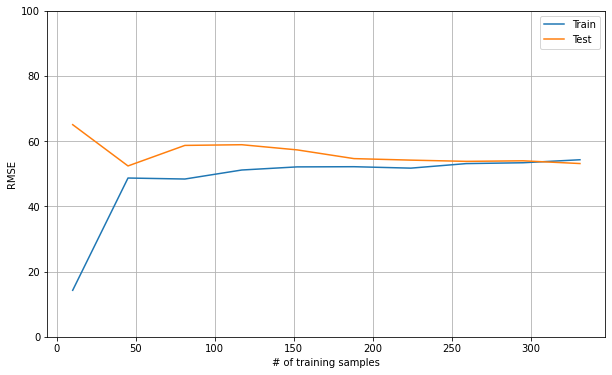

In [45]:
pipe3 = pip.Pipeline([
    ("scaler", pre.StandardScaler()), #anything besides last one needs to have transform and fit method
    ("sgd", lin.SGDRegressor(alpha=0.1,random_state=42,max_iter=10000)), #last one needs to have fit method
])

pipe3.fit(X_train,y_train.ravel())
plotLearningCurve(pipe3, X_train, y_train.ravel(), X_test, y_test.ravel(), n_iter=10,maxY=100)

In [46]:
y_pred = grid.best_estimator_.predict(X_test)

In [47]:

met.mean_squared_error(y_test,y_pred,squared=False)

53.121040177478015